#설정

In [3]:
# warning 방지
import warnings  
warnings.filterwarnings(action = 'ignore')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
# matplot lib에서 사용 가능한 한글 폰트
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath('/content/drive/MyDrive/socar/70sEnt/'))
plt.rc('font', family='NanumBarunGothic')

In [5]:
cd /content/drive/MyDrive/socar/70sEnt/

/content/drive/MyDrive/socar/70sEnt


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from Preprocessing import data_preprocessing

# 코드 정리


## 쏘카 파일 로딩

In [ ]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv("/content/drive/MyDrive/socar/데이터/20211022_수요예측_hackathon_data.csv", encoding='cp949')
df

In [9]:
socar_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/'
weather_file_path='/content/drive/MyDrive/00_Aiffelton/데이터/기상데이터/'
finedust_file_apth='/content/drive/MyDrive/00_Aiffelton/데이터/미세먼지/'
standard_time='reservation_start_at'
location=None

df = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,location)

In [10]:
regionA = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'A지역')
regionB = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'B지역')
regionC = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'C지역')
regionD = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'D지역')
regionE = data_preprocessing.timeseries_df_create_2(socar_file_path, weather_file_path, finedust_file_apth, standard_time,'E지역')

## 인구통계정보

In [ ]:
population_df = pd.read_csv("/content/drive/MyDrive/socar/데이터/인구구별데이터/시군구_성_연령_1세_별_주민등록연앙인구_20220425222717.csv", encoding='cp949')

In [ ]:
population_df["A연령대"] = population_df.iloc[:,3:12].sum(axis=1)
population_df["B연령대"] = population_df.iloc[:,12:22].sum(axis=1)
population_df["C연령대"] = population_df.iloc[:,22:32].sum(axis=1)
population_df["D연령대"] = population_df.iloc[:,32:42].sum(axis=1)
population_df["E연령대"] = population_df.iloc[:,42:62].sum(axis=1)
population_df

### 1. 특정지역-연령별 인구수와 쏘카 특정지역-연령별 사용량 비교





전체 지역의 인구 통계 정보를 활용하여 쏘카 이용률과 인구수가 유의미한 관계가 있는지 확인하였다.    

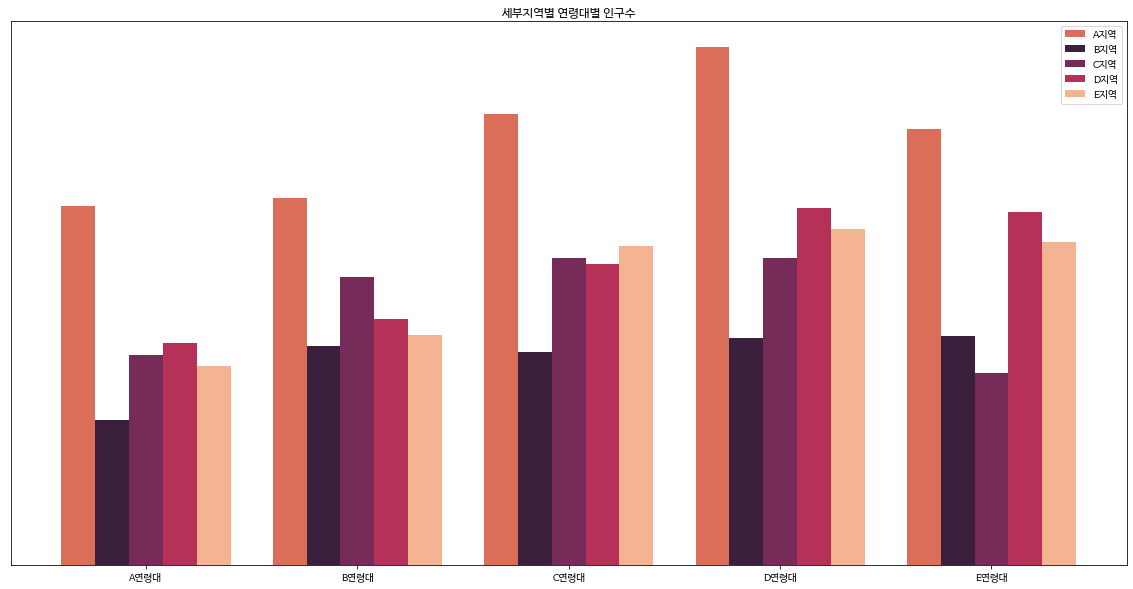

In [18]:
x_list = ["A연령대", "B연령대", "C연령대","D연령대","E연령대"]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]
value_a_x = create_x(5, 0.8, 1, 5)
value_b_x = create_x(5, 0.8, 2, 5)
value_c_x = create_x(5, 0.8, 3, 5)
value_d_x = create_x(5, 0.8, 4, 5)
value_e_x = create_x(5, 0.8, 5, 5)

f,ax = plt.subplots(figsize=(20,10))

ax.bar(value_a_x, population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#DB6E59" ,  label='A지역')
ax.bar(value_b_x, population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#3B203E" ,  label='B지역')
ax.bar(value_c_x, population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#772B58" ,  label='C지역')
ax.bar(value_d_x, population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#B53158" ,  label='D지역')
ax.bar(value_e_x, population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계"),population_df.columns[-5:]].values.reshape(5,), color ="#F5B491" , label='E지역')


middle_x = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(value_a_x, value_b_x,value_c_x,value_d_x,value_e_x)]
ax.set_xticks(middle_x)
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(x_list)
ax.legend()
plt.title("세부지역별 연령대별 인구수")
plt.show()

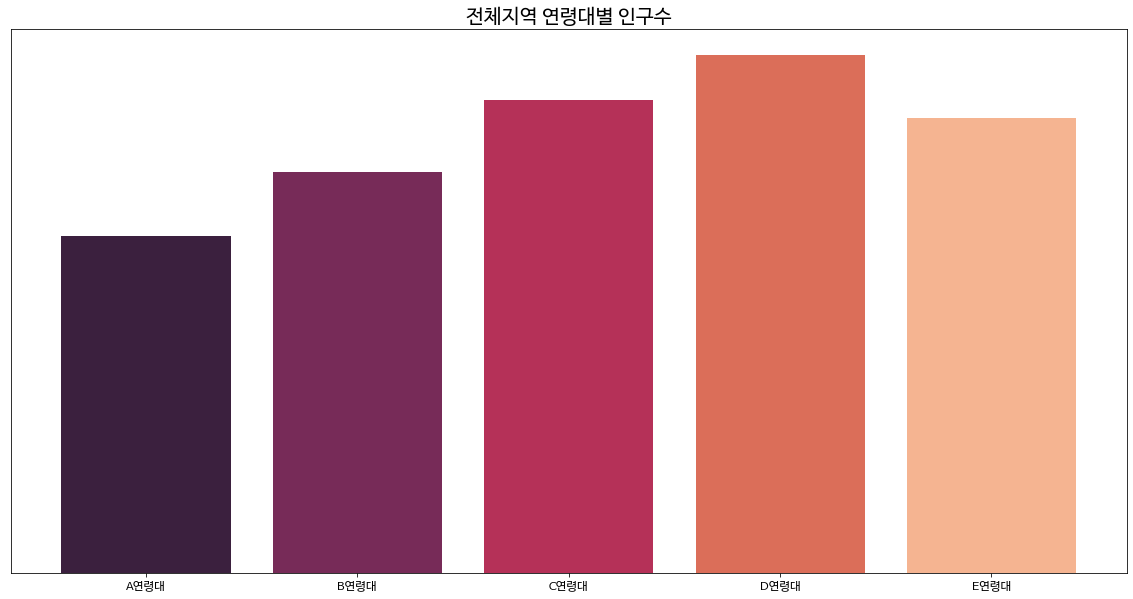

In [20]:
x_list = ["A연령대", "B연령대", "C연령대","D연령대","E연령대"]

plt.figure(figsize=(20,10))

plt.bar(x_list,population_df.iloc[0,-5:],color=["#3B203E","#772B58","#B53158","#DB6E59","#F5B491"])

plt.xticks(fontsize = 12)
ax=plt.gca()
ax.get_yaxis().set_visible(False)
plt.title("전체지역 연령대별 인구수",fontsize  = 20)
plt.show()

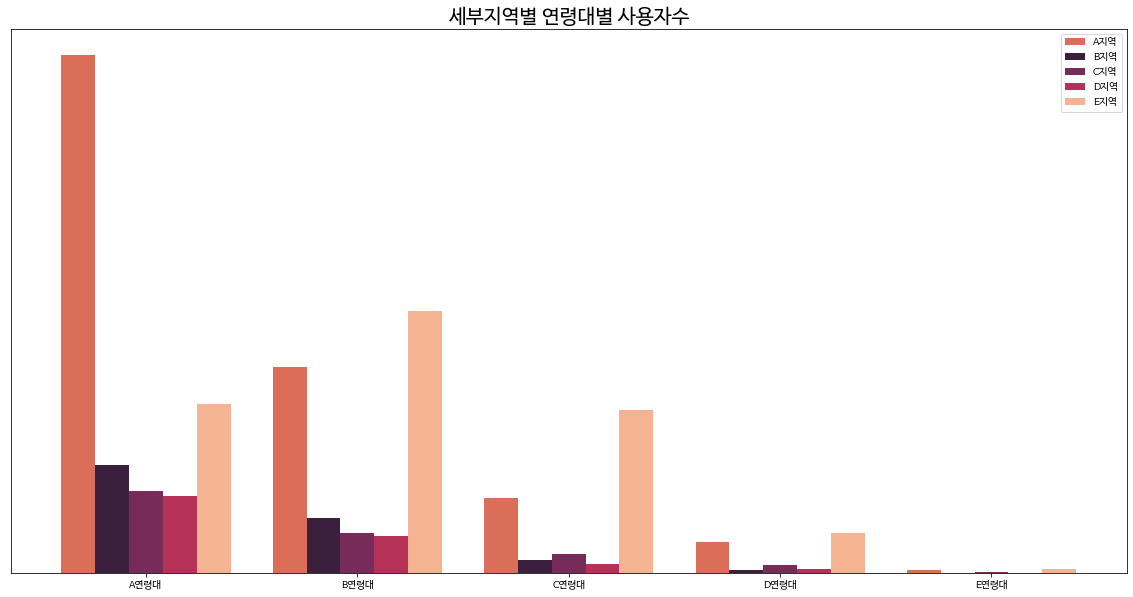

In [23]:
x_list = ["A연령대", "B연령대", "C연령대","D연령대","E연령대"]

f,ax = plt.subplots(figsize=(20,10))

ax.bar(value_a_x, regionA.iloc[:,2:7].sum(), color ="#DB6E59" ,  label='A지역')
ax.bar(value_b_x, regionB.iloc[:,2:7].sum(), color ="#3B203E" ,  label='B지역')
ax.bar(value_c_x, regionC.iloc[:,2:7].sum(), color ="#772B58" ,  label='C지역')
ax.bar(value_d_x, regionD.iloc[:,2:7].sum(), color ="#B53158" ,  label='D지역')
ax.bar(value_e_x, regionE.iloc[:,2:7].sum(), color ="#F5B491" , label='E지역')

middle_x = [(a+b+c+d+e)/5 for (a,b,c,d,e) in zip(value_a_x, value_b_x,value_c_x,value_d_x,value_e_x)]
ax.set_xticks(middle_x)
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(x_list)
ax.legend()
plt.title("세부지역별 연령대별 사용자수", fontsize=20)
plt.show()

절대적인 인구수를 확인하였을 때 연령대가 00할수록 인구수도 00하는 것을 확인하였다. 하지만 쏘카 이용률은 연령대가 00할수록 사용량이 00하는 것을 확인할 수 있었다.
이를 설명하기 위해 도출된 가설은 다음과 같다.   
**1. 쏘카 이용률과 스마트폰 기반의 서비스 친숙도는 연관이 있을 것이다.**   
  - 카쉐어링의 선호 요인 분석연구(2011, 김숙희 외 2인)에 따르면 젊은 층일수록 카쉐어링에 대한 선호도가 높은 것으로 나타났으며, 고령자의 경우 카쉐어링 이용방법의 어려움 외 여러 이유로 카쉐어링 이용 의사가 낮은 것으로 추정


**2. 쏘카 이용률과 연령대별 자동차 소유율은 관계가 있을 것이다.**      

## 자동차 소유율 (연령대별)

연령대별로 자동차 소유율이 다를 것이며, 이는 쏘카 이용률과 상관관계를 가질 것이라 가정하였다.   

1. 각 연령대별 a월부터 b월까지의 월평균 자동차 보유수를 구하였다.
2. 각 연령대별 보유수에서 전체지역 연령대별 인구수를 나누어 연령대별 자동차 보유율을 만들었다.
3. 2의 값과 쏘카 연령대별 이용률의 상관관계를 알아본다. 

In [25]:
own_car_df = pd.read_csv("/content/drive/MyDrive/socar/데이터/자동차 보유/성별_연령대_자동차보유수.csv")

In [27]:
#연령대별 차량 대수 추출
own_car_df_total = own_car_df.iloc[14:19,13]
own_car_df_total = own_car_df_total.reset_index()
own_car_df_total = own_car_df_total.drop(["index"],axis=1)

#콤마 제거
own_car_df_total.loc[own_car_df_total["계"].str.contains(","),["계"]] = own_car_df_total["계"].str.replace(',','')

#숫자 타입으로 변경 및 연령대별 월평균 소유 수 계산
own_car_df_total["계"] = own_car_df_total["계"].values.astype(int)
own_car_df_total["월평균"] = own_car_df_total["계"]/11
own_car_df_total = pd.DataFrame(own_car_df_total)
own_car_df_total = own_car_df_total.rename(index={0:"A연령대",1:"B연령대",2:"C연령대",3:"D연령대",4:"E연령대"})
own_car_df_total

,계,월평균
A연령대,144023,13093.000000
B연령대,865175,78652.272727
C연령대,1455775,132343.181818
D연령대,1820002,165454.727273
E연령대,1356658,123332.545455


In [28]:
#연령대별 인구 수
total_list = [int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계"),"A연령대"]), int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계"),"B연령대"]),int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계"),"C연령대"]),int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계"),"D연령대"]),int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계"),"E연령대"])]
own_car_df_total["total_pop_per_age"] = total_list

#자동차 보유율 컬럼 생성
own_car_df_total["자동차보유율"] = own_car_df_total["월평균"]/own_car_df_total["total_pop_per_age"] *100
own_car_df_total 

,계,월평균,total_pop_per_age,자동차보유율
A연령대,144023,13093.000000,136185,9.614128
B연령대,865175,78652.272727,162027,48.542695
C연령대,1455775,132343.181818,191138,69.239597
D연령대,1820002,165454.727273,209379,79.021644
E연령대,1356658,123332.545455,183921,67.057348


In [30]:
#전체지역 쏘카 연령대별 사용량
socar_1 = df.iloc[:,2].sum()
socar_2 = df.iloc[:,3].sum()
socar_3 = df.iloc[:,4].sum()
socar_4 = df.iloc[:,5].sum()
socar_5 = df.iloc[:,6].sum()

#전체지역 쏘카 전체 사용량
socar_all_pop = int(socar_1+socar_2+socar_3+socar_4+socar_5)
#전체지역 쏘카 연령대별 이용률
socar_total_list = [(socar_1)/(socar_all_pop)*100,(socar_2)/(socar_all_pop)*100,(socar_3)/(socar_all_pop)*100,(socar_4)/(socar_all_pop)*100,(socar_5)/(socar_all_pop)*100]

#연령대별 쏘카 이용률 컬럼 추가
own_car_df_total["쏘카이용비율"] = socar_total_list

In [31]:
own_car_df_total.iloc[:,3:].corr(method='pearson')

,자동차보유율,쏘카이용비율
자동차보유율,1.000000,-0.939485
쏘카이용비율,-0.939485,1.000000


연령대별 자동차 보유율과 쏘카 이용 비율이 반비례하는 것을 볼 수 있었다.   
새롭게 만든 데이터 프레임에서 자동차 보유율과 쏘카 이용 비율의 상관관계를 확인하기 위해 pearson 계수를 사용하였다. (선형적인 관계가 어떻게 되는지 알아보기 위함)   
- 관계 확인 결과 두 관계는 강한 음의 상관관계를 보인다.
- 즉, 자동차 보유율이 낮은 연령대일수록 쏘카 이용률이 높아진다는 것을 알 수 있었다.

이에 더 나아가 세부지역별-연령대별 차량 소유율에 따라서 세부지역별-연령대별 쏘카 이용률에 관계가 있을 것이라는 생각을 하였다.   
하지만 현재 주어진 데이터에서 세부지역별-연령대별 차량 소유율을 구할 수 없기 때문에 다음과 같은 공식을 통해 추정치를 구하였다.   
$$전체\,지역\,특정\, 연령대의 \,자동차\, 소유율 × 특정 \,지역의\, 특정\, 연령대의 \,비율=\frac{전체\,지역 \,특정\, 연령대\, 자동차\, 수}{전체\,지역 \, 특정\, 연령대\, 인구수} ×\frac{특정 \,지역의\, 특정 \,연령대\, 수}{특정 \,지역의\, 인구 \,수}$$
- 위 공식을 통해 추정한 세부지역별-연령대별 차량 소유율을 연령대별 쏘카 사용률 feature에 가중치를 다르게 줄 수 있을 것으로 판단하였다.



In [32]:
#각 연령대별 전체지역 인구수
total_1 = int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계")]["A연령대"])
total_2 = int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계")]["B연령대"])
total_3 = int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계")]["C연령대"])
total_4 = int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계")]["D연령대"])
total_5 = int(population_df.loc[(population_df["행정구역(시군구)별"]=="전체지역")&(population_df["성별"]=="계")]["E연령대"])

#각 연령대별 A지역 인구수
regionA_pop_1= int(population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계")]["A연령대"])
regionA_pop_2= int(population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계")]["B연령대"])
regionA_pop_3= int(population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계")]["C연령대"])
regionA_pop_4= int(population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계")]["D연령대"])
regionA_pop_5= int(population_df.loc[(population_df["행정구역(시군구)별"]=="A지역")&(population_df["성별"]=="계")]["E연령대"])

#각 연령대별 B지역 인구수
regionB_pop_1= int(population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계")]["A연령대"])
regionB_pop_2= int(population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계")]["B연령대"])
regionB_pop_3= int(population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계")]["C연령대"])
regionB_pop_4= int(population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계")]["D연령대"])
regionB_pop_5= int(population_df.loc[(population_df["행정구역(시군구)별"]=="B지역")&(population_df["성별"]=="계")]["E연령대"])

#각 연령대별 C지역 인구수
regionC_pop_1= int(population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계")]["A연령대"])
regionC_pop_2= int(population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계")]["B연령대"])
regionC_pop_3= int(population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계")]["C연령대"])
regionC_pop_4= int(population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계")]["D연령대"])
regionC_pop_5= int(population_df.loc[(population_df["행정구역(시군구)별"]=="C지역")&(population_df["성별"]=="계")]["E연령대"])

#각 연령대별 D지역 인구수
regionD_pop_1= int(population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계")]["A연령대"])
regionD_pop_2= int(population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계")]["B연령대"])
regionD_pop_3= int(population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계")]["C연령대"])
regionD_pop_4= int(population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계")]["D연령대"])
regionD_pop_5= int(population_df.loc[(population_df["행정구역(시군구)별"]=="D지역")&(population_df["성별"]=="계")]["E연령대"])

#각 연령대별 E지역 인구수
regionE_pop_1= int(population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계")]["A연령대"])
regionE_pop_2= int(population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계")]["B연령대"])
regionE_pop_3= int(population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계")]["C연령대"])
regionE_pop_4= int(population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계")]["D연령대"])
regionE_pop_5= int(population_df.loc[(population_df["행정구역(시군구)별"]=="E지역")&(population_df["성별"]=="계")]["E연령대"])

In [33]:
#A지역 연령대별 비율
regionA_1 = regionA_pop_1 / (regionA_pop_1 + regionA_pop_2 + regionA_pop_3 + regionA_pop_4 + regionA_pop_5)*100
regionA_2 = regionA_pop_2 / (regionA_pop_1 + regionA_pop_2 + regionA_pop_3 + regionA_pop_4 + regionA_pop_5)*100
regionA_3 = regionA_pop_3 / (regionA_pop_1 + regionA_pop_2 + regionA_pop_3 + regionA_pop_4 + regionA_pop_5)*100
regionA_4 = regionA_pop_4 / (regionA_pop_1 + regionA_pop_2 + regionA_pop_3 + regionA_pop_4 + regionA_pop_5)*100
regionA_5 = regionA_pop_5 / (regionA_pop_1 + regionA_pop_2 + regionA_pop_3 + regionA_pop_4 + regionA_pop_5)*100

#B지역 연령대별 비율
regionB_1 = regionB_pop_1 / (regionB_pop_1 + regionB_pop_2 + regionB_pop_3 + regionB_pop_4 + regionB_pop_5)*100
regionB_2 = regionB_pop_2 / (regionB_pop_1 + regionB_pop_2 + regionB_pop_3 + regionB_pop_4 + regionB_pop_5)*100
regionB_3 = regionB_pop_3 / (regionB_pop_1 + regionB_pop_2 + regionB_pop_3 + regionB_pop_4 + regionB_pop_5)*100
regionB_4 = regionB_pop_4 / (regionB_pop_1 + regionB_pop_2 + regionB_pop_3 + regionB_pop_4 + regionB_pop_5)*100
regionB_5 = regionB_pop_5 / (regionB_pop_1 + regionB_pop_2 + regionB_pop_3 + regionB_pop_4 + regionB_pop_5)*100

#C지역 연령대별 비율
regionC_1 = regionC_pop_1 / (regionC_pop_1 + regionC_pop_2 +regionC_pop_3 + regionC_pop_4 + regionC_pop_5)*100
regionC_2 = regionC_pop_2 / (regionC_pop_1 + regionC_pop_2 +regionC_pop_3 + regionC_pop_4 + regionC_pop_5)*100
regionC_3 = regionC_pop_3 / (regionC_pop_1 + regionC_pop_2 +regionC_pop_3 + regionC_pop_4 + regionC_pop_5)*100
regionC_4 = regionC_pop_4 / (regionC_pop_1 + regionC_pop_2 +regionC_pop_3 + regionC_pop_4 + regionC_pop_5)*100
regionC_5 = regionC_pop_5 / (regionC_pop_1 + regionC_pop_2 +regionC_pop_3 + regionC_pop_4 + regionC_pop_5)*100

#D지역 연령대별 비율
regionD_1 = regionD_pop_1 / (regionD_pop_1 + regionD_pop_2 +regionD_pop_3 + regionD_pop_4 + regionD_pop_5)*100
regionD_2 = regionD_pop_2 / (regionD_pop_1 + regionD_pop_2 +regionD_pop_3 + regionD_pop_4 + regionD_pop_5)*100
regionD_3 = regionD_pop_3 / (regionD_pop_1 + regionD_pop_2 +regionD_pop_3 + regionD_pop_4 + regionD_pop_5)*100
regionD_4 = regionD_pop_4 / (regionD_pop_1 + regionD_pop_2 +regionD_pop_3 + regionD_pop_4 + regionD_pop_5)*100
regionD_5 = regionD_pop_5 / (regionD_pop_1 + regionD_pop_2 +regionD_pop_3 + regionD_pop_4 + regionD_pop_5)*100

#E지역 연령대별 비율
regionE_1 = regionE_pop_1 / (regionE_pop_1 + regionE_pop_2 +regionE_pop_3 +regionE_pop_4 + regionE_pop_5)*100
regionE_2 = regionE_pop_2 / (regionE_pop_1 + regionE_pop_2 +regionE_pop_3 +regionE_pop_4 + regionE_pop_5)*100
regionE_3 = regionE_pop_3 / (regionE_pop_1 + regionE_pop_2 +regionE_pop_3 +regionE_pop_4 + regionE_pop_5)*100
regionE_4 = regionE_pop_4 / (regionE_pop_1 + regionE_pop_2 +regionE_pop_3 +regionE_pop_4 + regionE_pop_5)*100
regionE_5 = regionE_pop_5 / (regionE_pop_1 + regionE_pop_2 +regionE_pop_3 +regionE_pop_4 + regionE_pop_5)*100

In [38]:
#공식에 따른 지역-연령대별 자동차 소유율 추정치
A_list = [int(own_car_df_total.iloc[0,1])/total_1*regionA_1, int(own_car_df_total.iloc[1,1])/total_2*regionA_2,int(own_car_df_total.iloc[2,1])/total_3*regionA_3,int(own_car_df_total.iloc[3,1])/total_4*regionA_4, int(own_car_df_total.iloc[4,1])/total_5*regionA_5]
B_list = [int(own_car_df_total.iloc[0,1])/total_1*regionB_1,int(own_car_df_total.iloc[1,1])/total_2*regionB_2,int(own_car_df_total.iloc[2,1])/total_3*regionB_3,int(own_car_df_total.iloc[3,1])/total_4*regionB_4, int(own_car_df_total.iloc[4,1])/total_5*regionB_5]
C_list = [int(own_car_df_total.iloc[0,1])/total_1*regionC_1,int(own_car_df_total.iloc[1,1])/total_2*regionC_2,int(own_car_df_total.iloc[2,1])/total_3*regionC_3,int(own_car_df_total.iloc[3,1])/total_4*regionC_4, int(own_car_df_total.iloc[4,1])/total_5*regionC_5]
D_list = [int(own_car_df_total.iloc[0,1])/total_1*regionD_1,int(own_car_df_total.iloc[1,1])/total_2*regionD_2,int(own_car_df_total.iloc[2,1])/total_3*regionD_3,int(own_car_df_total.iloc[3,1])/total_4*regionD_4, int(own_car_df_total.iloc[4,1])/total_5*regionD_5]
E_list = [int(own_car_df_total.iloc[0,1])/total_1*regionE_1,int(own_car_df_total.iloc[1,1])/total_2*regionE_2,int(own_car_df_total.iloc[2,1])/total_3*regionE_3,int(own_car_df_total.iloc[3,1])/total_4*regionE_4, int(own_car_df_total.iloc[4,1])/total_5*regionE_5]

#특정지역_연령대 차량 소유율과 전체 지역 쏘카 연령대별 이용 비율
pop_car_rate1 = {"A지역연령별소유율": A_list , "B지역연령별소유율":B_list, "C지역연령별소유율":C_list, "D지역연령별소유율":D_list,"E지역연령별소유율":E_list}
pop_car_rate1 = pd.DataFrame(pop_car_rate1)
pop_car_rate1["쏘카연령대이용비율"] = socar_total_list
pop_car_rate1 = pop_car_rate1.rename(index={0:"A연령대",1:"B연령대",2:"C연령대",3:"D연령대",4:"E연령대"})

In [35]:
def age_count(df):
  count_rate=[]
  for i in range(2,7):
    total = df["count"].sum()
    
    rate = df.iloc[:,i].sum()/total

    count_rate.append(rate*100)
  return count_rate

In [39]:
regionA_rate = age_count(regionA)
regionB_rate = age_count(regionB)
regionC_rate = age_count(regionC)
regionD_rate = age_count(regionD)
regionE_rate = age_count(regionE)

In [42]:
#쏘카 지역-연령별 이용률
pop_car_rate2 = {"A지역이용률": regionA_rate , "B지역이용률":regionA_rate, "C지역이용률":regionC_rate, "D지역이용률":regionD_rate,"E지역이용률": regionE_rate}
pop_car_rate2 = pd.DataFrame(pop_car_rate2)
pop_car_rate2 = pop_car_rate2.rename(index={0:"A연령대",1:"B연령대",2:"C연령대",3:"D연령대",4:"E연령대"})
pop_car_rate = pd.concat([pop_car_rate1,pop_car_rate2],axis=1)

In [43]:
pop_car_rate.corr()

,A지역연령별소유율,B지역연령별소유율,C지역연령별소유율,D지역연령별소유율,E지역연령별소유율,쏘카연령대이용비율,A지역이용률,B지역이용률,C지역이용률,D지역이용률,E지역이용률
A지역연령별소유율,1.000000,0.977230,0.934422,0.986504,0.991892,-0.926127,-0.928895,-0.928895,-0.927914,-0.941840,-0.590054
B지역연령별소유율,0.977230,1.000000,0.910483,0.980263,0.979771,-0.950527,-0.982008,-0.982008,-0.974086,-0.979898,-0.534739
C지역연령별소유율,0.934422,0.910483,1.000000,0.869378,0.902547,-0.756306,-0.831939,-0.831939,-0.798448,-0.833177,-0.275256
D지역연령별소유율,0.986504,0.980263,0.869378,1.000000,0.992593,-0.973847,-0.956568,-0.956568,-0.966430,-0.969200,-0.680315
E지역연령별소유율,0.991892,0.979771,0.902547,0.992593,1.000000,-0.957130,-0.952459,-0.952459,-0.955195,-0.969582,-0.629417
쏘카연령대이용비율,-0.926127,-0.950527,-0.756306,-0.973847,-0.957130,1.000000,0.968750,0.968750,0.987781,0.980463,0.739665
A지역이용률,-0.928895,-0.982008,-0.831939,-0.956568,-0.952459,0.968750,1.000000,1.000000,0.995129,0.995313,0.550153
B지역이용률,-0.928895,-0.982008,-0.831939,-0.956568,-0.952459,0.968750,1.000000,1.000000,0.995129,0.995313,0.550153
C지역이용률,-0.927914,-0.974086,-0.798448,-0.966430,-0.955195,0.987781,0.995129,0.995129,1.000000,0.995269,0.628419
D지역이용률,-0.941840,-0.979898,-0.833177,-0.969200,-0.969582,0.980463,0.995313,0.995313,0.995269,1.000000,0.598395


- 위에 나타낸 공식으로 특정지역-연령대별 자동차 소유율 추정치와 실제 쏘카 특정지역-연령대별 이용률의 상관관계(pearson)를 나타냄
- 단순 연령대 자동차 보유율과 쏘카 이용비율의 상관관계 계수가 -0.93이 도출됨
  - 이와 비교하여 추정치를 통한 상관관계(강한 음의 상관관계 도출됨 (-0.9~-0.8))를 보았을 때 전체 연령대 자동차 소유율을 그대로 가공하지 않은 feature로 사용하여도 될 것으로 판단됨   
- 추가 insight   
  - 지역 E는 다른 지역과 쏘카 이용 목적이 다른 것으로 판단됨